---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    recall_score,
    )


pandas = pd
numpy = np

In [60]:
VERBOSE = True

In [86]:
if VERBOSE:
    %matplotlib inline
    import seaborn
    style = seaborn.axes_style("whitegrid")
    style["axes.grid"] = False
    seaborn.set_style("whitegrid", style)

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [61]:
def answer_one():
    data = pandas.read_csv("fraud_data.csv")
    return sum(data.Class)/len(data.Class)

In [62]:
if VERBOSE:
    print("Fraction of cases that were fraud: {0:.2f}".format(answer_one()))

Fraction of cases that were fraud: 0.02


In [63]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [64]:
def answer_two():
    strategy = "most_frequent"
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    predicted = dummy.predict(X_test)
    accuracy = dummy.score(X_test, y_test)
    recall = recall_score(y_test, predicted)
    
    return (accuracy, recall)

In [65]:
y_train.value_counts()

0    15993
1      276
Name: Class, dtype: int64

In [66]:
if VERBOSE:
    accuracy, recall = answer_two()
    print("the most common class is 0, so it won't predict any of the cases to be 1")
    print("DummyClassifier: accuracy={0:.2f} recall={1:.5f}".format(
        accuracy, recall))

the most common class is 0, so it won't predict any of the cases to be 1
DummyClassifier: accuracy=0.99 recall=0.00000


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [67]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    model = SVC()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    return (accuracy, recall, precision)

In [68]:
if VERBOSE:
    print("SCV: accuracy={0:.2f} recall={1:.2f} precision={2:.2f}".format(*answer_three()))

SCV: accuracy=0.99 recall=0.38 precision=1.00


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [82]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    model = SVC(C=1e9, gamma=1e-07)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return confusion_matrix(y_test, predictions)

In [83]:
answer_four()


array([[5340,    4],
       [  16,   64]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

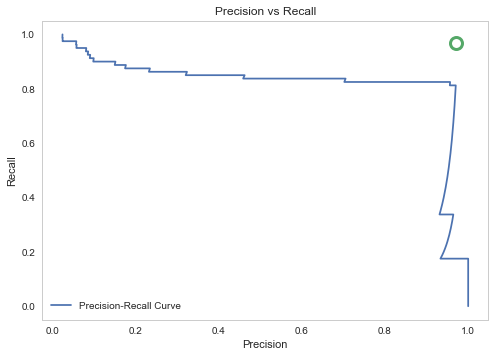

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_scores = model.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_precision = precision[closest_zero]
closest_zero_recall = precision[closest_zero]
figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
axe.legend()
title = axe.set_title("Precision vs Recall")


In [70]:
def answer_five():
    # Your code here
    
    return # Return your answer

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [71]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    
    return # Return your answer

In [72]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())